<a href="https://colab.research.google.com/github/seantibor/uorganisms/blob/master/Generations%20Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Simple Genetics Simulator
## by Kelly Paredes and Sean Tibor

This notebook is a simple genetics simulator in Python. It is used to explore how population size and reproduction affect the size and outcome of the population over time. 

Transmission of genes from one generation to the next, (or the passing of genes from parent to offspring) is affected by where a species lives. Sometimes animals die from disease, predators or loss of habitat, other times animals will migrate.  Either way, the size of a population is a very important part when looking at (analyzing) genetics.

This sometimes will cause a genetic drift. Answer these questions:
1. What is genetic drift?
2. What does genetic drift often cause?
3. How does population size affect genetic drift?

In [1]:
!git init
!git remote add origin https://github.com/seantibor/uorganisms
!git pull
!pip install -r requirements.txt
  
import sys
sys.path.append('lib')
import generations
from organisms import Organism
import pandas as pd
import matplotlib.pyplot as plt


Reinitialized existing Git repository in /Users/sean.tibor/Documents/code/uorganisms/.git/
fatal: remote origin already exists.
Already up to date.


This code has a few variables that can be changed by you. It is important that as a scientist, you only change ONE variable at a time. The variables are defined here:


* INITIAL_POP: The initial population size of organisms. This is the number of species living together in an area. This is a mix of both male and female species. Each species/organism in this population have traits that are chosen at random.

* GENERATIONS: The is the number of generations that the population will reproduce. For example, from your great granparents to you, that is 4 generations.  You can simulate as many times as you want, but the more generations you have, the longer the code will take to run. You can edit the numberbetween 10- 500. Each organism will reproduce with only one organism of the opposite gender in its generation and will produce a random "family_size".

* POPULATION_CAP: This is the maximum number of organisms in a generation. Sometimes populations are controlled in real life because an animal predator may no longer exist, there are "too" many organisms and not enough habitat or food or humans may want to just manage the numbers. Therefore, in this simulation any extra organisms will be culled (killed off) once the population cap is reached.

---
These two variables should be changed with caution! These numbers affect statistics. Currently the family size is set to an average number with a standard deviation. For humans that average family time changes over time. Currently as of 2018, the average family size is 3.4 compared to this simualtions family size of 2.05.

* FAMILY_SIZE: The mean number, average number,  of offspring from a reproductive pair.
* FAMILY_STDEV: The standard deviation, is a number used to quantify a variation of family size.
* POPULATION_CONTROL

In [2]:
INITIAL_POP = 1000
GENERATIONS = 500
POPULATION_CAP = 2000
FAMILY_SIZE = 2.05
FAMILY_STDEV = 0.9
POPULATIONS_CONTROL = None


The section below will show the simulation of each generation. On each line you will see the generation number and the number of males and females in the population. The algorithm in the computer program is written to randomly choose a male and female organism for reproduction. The result of this reproduction is a not the same every generation. It is a normalized number, which means that it has been calculated with a variant number of offspring using the FAMLIY_SIZE and FAMILY_STDEV. Therefore each generation will have a different number, just  sometimes in your family tree.

In addition, if there aren't an equal number of male and female organisms, or the total number of new organisms exceeds the population_cap, the remaining organisms are not allowed to reproduce.

In [3]:
generations.test_run(INITIAL_POP, GENERATIONS, POPULATION_CAP, FAMILY_SIZE, FAMILY_STDEV)

446 male and 554 female organisms in first generation
Simulating 499 more generations..


# Trend Charts
First, we'll chart the total population size with a breakdown of the number of organisms with each color gene pair.

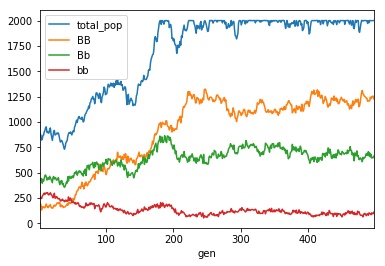

In [4]:
overall_stats = generations.get_overall_stats()

# create a pandas dataframe from the overall statistics
df = pd.DataFrame.from_dict(overall_stats)
df.index = df.loc[:,'gen']

# plot the color genes
df.plot(y=['total_pop', 'BB', 'Bb', 'bb'])
plt.show()

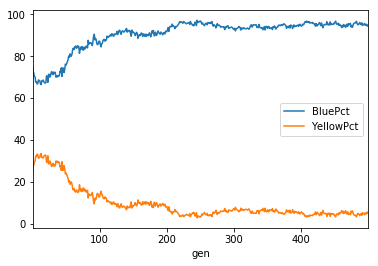

In [6]:
# plot the color trait percentages by generation
df['BluePct'] = df.loc[:,'blue'] / df.loc[:,'total_pop'] * 100
df['YellowPct'] = df.loc[:,'yellow'] / df.loc[:,'total_pop'] * 100

df.plot(y=['BluePct', 'YellowPct'])
plt.show()

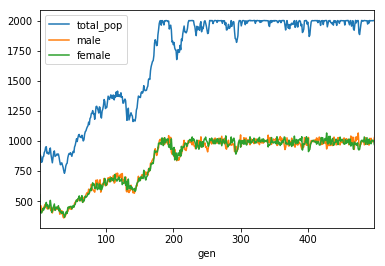

In [7]:
df.plot(y=['total_pop', 'male', 'female'])
plt.show()